[*********************100%***********************]  1 of 1 completed


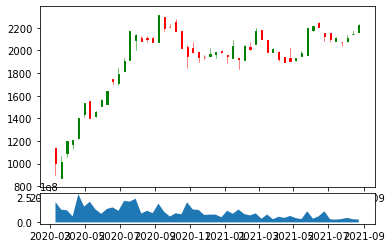

In [6]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import yfinance as yf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
df=yf.download(tickers= "RELIANCE.NS", period='365d', interval='1d')
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)
ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()

<AxesSubplot:xlabel='Date'>

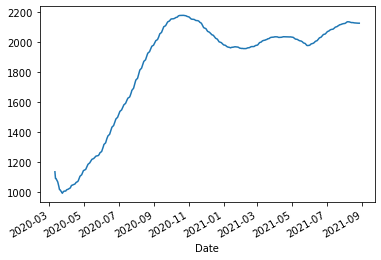

In [2]:
df['Moving_av']= df['Adj Close'].rolling(window=50,min_periods=0).mean()
df['Moving_av'].plot()

In [3]:
i=1
rate_increase_in_vol=[0]
rate_increase_in_adj_close=[0]
while i<len(df):
    rate_increase_in_vol.append(df.iloc[i]['Volume']-df.iloc[i-1]['Volume'])
    rate_increase_in_adj_close.append(df.iloc[i]['Adj Close']-df.iloc[i-1]['Adj Close'])
    i+=1
    
df['Increase_in_vol']=rate_increase_in_vol
df['Increase_in_adj_close']=rate_increase_in_adj_close

<AxesSubplot:xlabel='Date'>

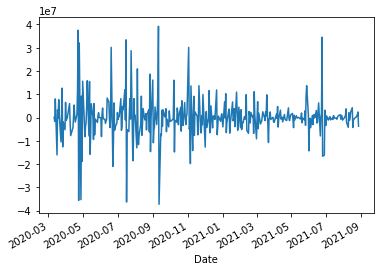

In [4]:
df['Increase_in_vol'].plot()

<AxesSubplot:xlabel='Date'>

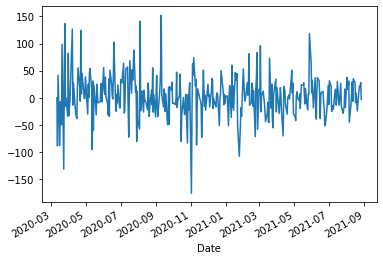

In [5]:
df['Increase_in_adj_close'].plot()